# Final EDA 

In [199]:
import pandas as pd 
filtered_df = pd.read_excel('../../data/Lstm_Dates.xlsx')
# Replace all missing values (NaN) in the 'items' column with 'Rice (Rs/kg)_Nadu 2'
filtered_df['items'] = filtered_df['items'].fillna('Rice (Rs/kg)_Nadu 2')
filtered_df.head(10)

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
0,2019-05-31,Rice (Rs/kg)_Nadu 2,84.0,83.0,85.0,131.1,0.84,0.0,2.0,84.0
1,2019-06-01,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-02,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-03,Rice (Rs/kg)_Nadu 2,84.0,83.0,85.0,134.5,9.28,0.0,2.0,84.0
4,2019-06-04,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-06-05,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-06-06,Rice (Rs/kg)_Nadu 2,82.0,78.0,83.0,134.5,4.34,0.0,5.0,80.5
7,2019-06-07,Rice (Rs/kg)_Nadu 2,81.0,78.0,84.0,134.5,19.28,0.0,6.0,81.0
8,2019-06-08,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-06-09,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
# Time-based interpolation (useful for datetime indices)
filtered_df['pettah_average'] = filtered_df['pettah_average'].interpolate(method='linear', limit_direction='both')

# Time-based interpolation on Food_inflation_Base_2013
filtered_df['food_inflation_Base_2013'] = filtered_df['food_inflation_Base_2013'].interpolate(method='linear', limit_direction='both')

In [201]:
filtered_df.head(10)

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
0,2019-05-31,Rice (Rs/kg)_Nadu 2,84.000000,83.0,85.0,131.100000,0.84,0.0,2.0,84.0
1,2019-06-01,Rice (Rs/kg)_Nadu 2,84.000000,NaN,NaN,132.233333,NaN,NaN,NaN,NaN
2,2019-06-02,Rice (Rs/kg)_Nadu 2,84.000000,NaN,NaN,133.366667,NaN,NaN,NaN,NaN
3,2019-06-03,Rice (Rs/kg)_Nadu 2,84.000000,83.0,85.0,134.500000,9.28,0.0,2.0,84.0
4,2019-06-04,Rice (Rs/kg)_Nadu 2,83.333333,NaN,NaN,134.500000,NaN,NaN,NaN,NaN
5,2019-06-05,Rice (Rs/kg)_Nadu 2,82.666667,NaN,NaN,134.500000,NaN,NaN,NaN,NaN
6,2019-06-06,Rice (Rs/kg)_Nadu 2,82.000000,78.0,83.0,134.500000,4.34,0.0,5.0,80.5
7,2019-06-07,Rice (Rs/kg)_Nadu 2,81.000000,78.0,84.0,134.500000,19.28,0.0,6.0,81.0
8,2019-06-08,Rice (Rs/kg)_Nadu 2,80.933333,NaN,NaN,134.500000,NaN,NaN,NaN,NaN
9,2019-06-09,Rice (Rs/kg)_Nadu 2,80.866667,NaN,NaN,134.500000,NaN,NaN,NaN,NaN


## Inflation Data plot

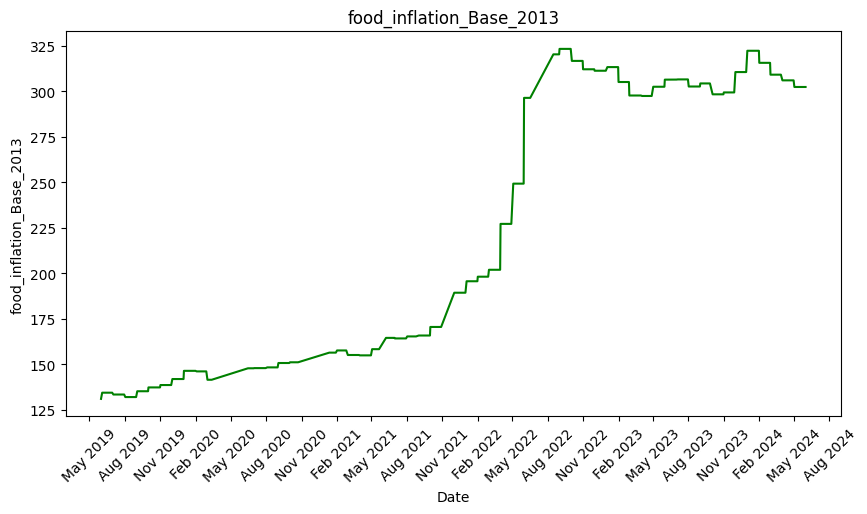

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Ensure 'date' is a datetime object
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot pettah_average over time
sns.lineplot(data=filtered_df, x='date', y='food_inflation_Base_2013', ax=ax, color='green')

# Add titles and labels
ax.set_title('food_inflation_Base_2013')
ax.set_xlabel('Date')
ax.set_ylabel('food_inflation_Base_2013')

# Set x-axis format to show the month and year (e.g., Jan 2024)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set the interval for x-axis ticks to every 3 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Pettah Average Data Plot 

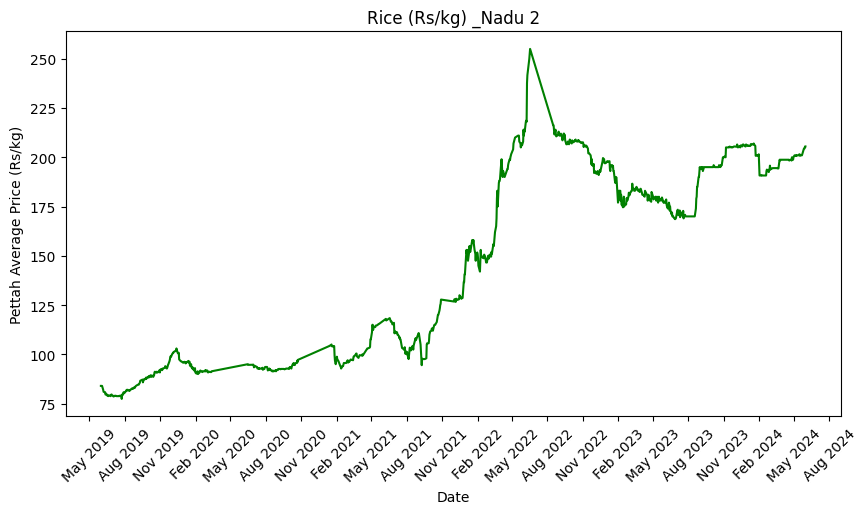

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Ensure 'date' is a datetime object
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot pettah_average over time
sns.lineplot(data=filtered_df, x='date', y='pettah_average', ax=ax, color='green')

# Add titles and labels
ax.set_title('Rice (Rs/kg) _Nadu 2')
ax.set_xlabel('Date')
ax.set_ylabel('Pettah Average Price (Rs/kg)')

# Set x-axis format to show the month and year (e.g., Jan 2024)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set the interval for x-axis ticks to every 3 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Comparison Nadu_2 Price with Inflation Rates

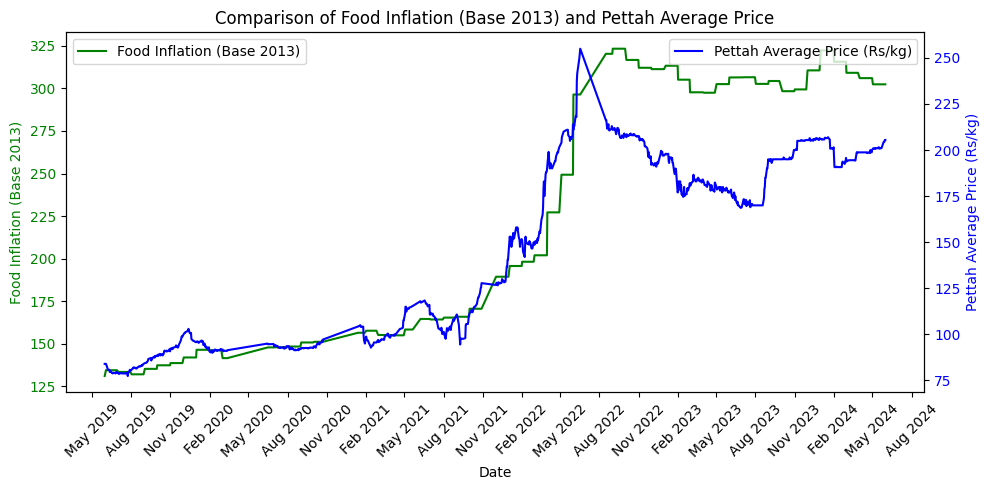

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# Ensure 'date' is a datetime object
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Set up the plot with a shared x-axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot 'food_inflation_Base_2013' on the primary y-axis
sns.lineplot(data=filtered_df, x='date', y='food_inflation_Base_2013', ax=ax1, color='green', label='Food Inflation (Base 2013)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Food Inflation (Base 2013)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Set x-axis format to show the month and year (e.g., Jan 2024)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Create a secondary y-axis for 'pettah_average' prices
ax2 = ax1.twinx()
sns.lineplot(data=filtered_df, x='date', y='pettah_average', ax=ax2, color='blue', label='Pettah Average Price (Rs/kg)')
ax2.set_ylabel('Pettah Average Price (Rs/kg)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title and adjust layout
plt.title('Comparison of Food Inflation (Base 2013) and Pettah Average Price')
fig.tight_layout()  # Ensures labels don't overlap
plt.show()


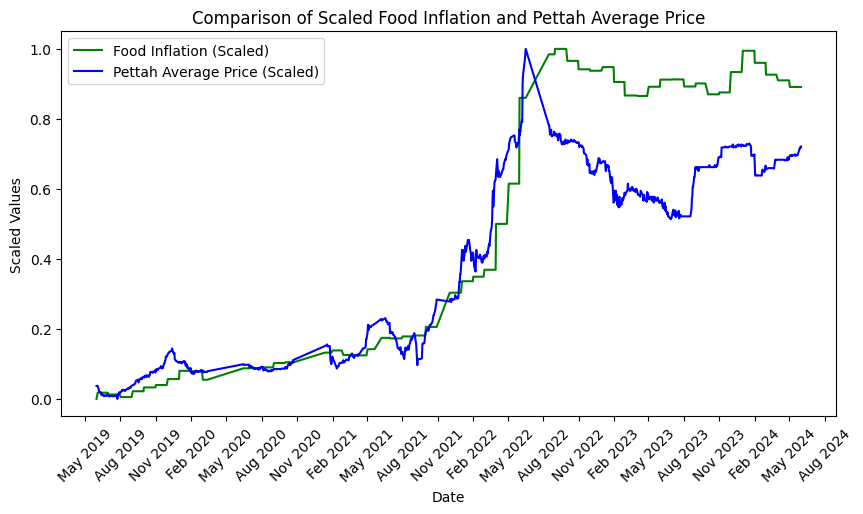

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Ensure 'date' is a datetime object
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform both columns to scale between 0 and 1
filtered_df['scaled_inflation'] = scaler.fit_transform(filtered_df[['food_inflation_Base_2013']])
filtered_df['scaled_rice_price'] = scaler.fit_transform(filtered_df[['pettah_average']])

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the scaled data
sns.lineplot(data=filtered_df, x='date', y='scaled_inflation', ax=ax, color='green', label='Food Inflation (Scaled)')
sns.lineplot(data=filtered_df, x='date', y='scaled_rice_price', ax=ax, color='blue', label='Pettah Average Price (Scaled)')

# Add titles and labels
ax.set_title('Comparison of Scaled Food Inflation and Pettah Average Price')
ax.set_xlabel('Date')
ax.set_ylabel('Scaled Values')

# Format x-axis to show the month and year (e.g., Jan 2024)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Rotate date labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.legend()
plt.show()


## Cross-Correlation Analysis on Inflation and Nadu Prices

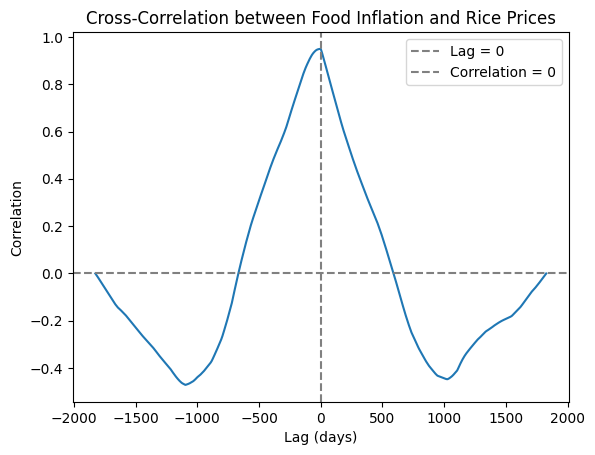

In [206]:
import numpy as np
from scipy.signal import correlate

# Calculate cross-correlation with lag
food_inflation = filtered_df['scaled_inflation']
rice_prices = filtered_df['scaled_rice_price']

lags = np.arange(-len(rice_prices) + 1, len(food_inflation))
correlation = correlate(rice_prices - np.mean(rice_prices), food_inflation - np.mean(food_inflation), mode='full') / (len(rice_prices) * np.std(rice_prices) * np.std(food_inflation))

# Plot cross-correlation to find the lag with highest correlation
plt.plot(lags, correlation)
plt.axvline(x=0, color='gray', linestyle='--', label="Lag = 0")
plt.axhline(y=0, color='gray', linestyle='--', label="Correlation = 0")
plt.title("Cross-Correlation between Food Inflation and Rice Prices")
plt.xlabel("Lag (days)")
plt.ylabel("Correlation")
plt.legend()
plt.show()

### Note
1. Strong positive correlation near lag 0 suggests that inflation rates and rice prices tend to rise and fall together with minimal delay.
2. Positive correlations at moderate lags (500-1000 days) suggest that past inflation can affect future rice prices with a delay.
3. Negative correlations at certain lags (like 1000 days) indicate possible inverse effects over long periods.


## Granger Causality Test

In [207]:
from statsmodels.tsa.stattools import grangercausalitytests

# Prepare data for Granger causality test
data = filtered_df[['scaled_inflation', 'scaled_rice_price']]
max_lag = 12  # Adjust as needed for monthly/quarterly data
grangercausalitytests(data, maxlag=max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=53.9237 , p=0.0000  , df_denom=1824, df_num=1
ssr based chi2 test:   chi2=54.0124 , p=0.0000  , df=1
likelihood ratio test: chi2=53.2294 , p=0.0000  , df=1
parameter F test:         F=53.9237 , p=0.0000  , df_denom=1824, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=33.1786 , p=0.0000  , df_denom=1821, df_num=2
ssr based chi2 test:   chi2=66.5393 , p=0.0000  , df=2
likelihood ratio test: chi2=65.3557 , p=0.0000  , df=2
parameter F test:         F=33.1786 , p=0.0000  , df_denom=1821, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=21.5590 , p=0.0000  , df_denom=1818, df_num=3
ssr based chi2 test:   chi2=64.9259 , p=0.0000  , df=3
likelihood ratio test: chi2=63.7977 , p=0.0000  , df=3
parameter F test:         F=21.5590 , p=0.0000  , df_denom=1818, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=16.1528 , p=0.

{1: ({'ssr_ftest': (53.92367877964966, 3.1259600871502263e-13, 1824.0, 1),
   'ssr_chi2test': (54.0123690408004, 1.9923146187077482e-13, 1),
   'lrtest': (53.229368539585266, 2.9678826854459127e-13, 1),
   'params_ftest': (53.92367877966383, 3.125960087128648e-13, 1824.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (33.17856733324429, 7.031682430114686e-15, 1821.0, 2),
   'ssr_chi2test': (66.53933437726971, 3.5576819896130885e-15, 2),
   'lrtest': (65.3556593338908, 6.429821182358816e-15, 2),
   'params_ftest': (33.178567333263544, 7.0316824299835825e-15, 1821.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (21.55896584662237, 1.0141475993203076e-13, 1818.0, 3),
   'ssr_chi2test': (64.92592849849149, 5.2024016590136877e-14, 3),
   'lrtest': (63.79771124718536, 9.067753904104096e-14, 3),
   'params_ftest': (21.55896584662143, 1.014147599321655e-13, 1818.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0.,

### Note 
- Since "P is extremly low we can say inflation lags have significant that means we can use this to predict the food prices
- Granger causality provides statistical evidence that lagged inflation rates have a meaningful impact on rice prices, which can be valuable information when building a predictive model for rice prices.
- All p-values are very low (close to 0) for each lag: This consistently suggests that the null hypothesis (that inflation does not help predict rice prices) is rejected for  each lag from 1 to 12.
- Significance across multiple tests: Each lag shows significant results across different statistical tests (F-test, Chi-squared, Likelihood Ratio), confirming a strong predictive relationship.
### Implication for Lags:
Significant p-values across all lags (from 1 up to 12) imply that inflation rates from 1 to 12 periods ago (e.g., days, months, or whichever time unit used) contain useful information for predicting current rice prices.
This indicates both short-term (e.g., lag 1) and potentially longer-term effects (e.g., lag 12) of inflation rates on rice prices.

## Lead - Lag Scatter Plot

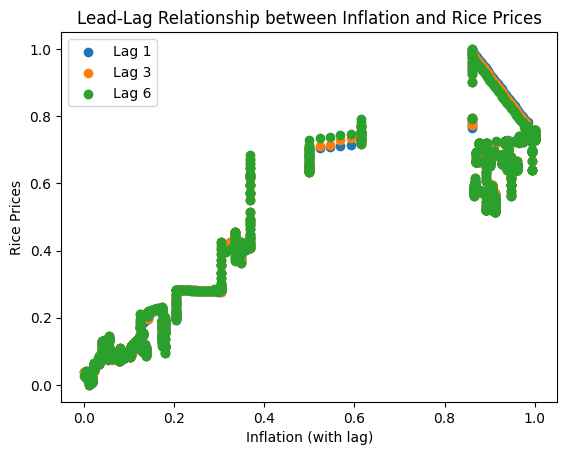

In [208]:
# Shift inflation data by different lags and plot against rice prices
for lag in [1, 3, 6]:
    filtered_df[f'inflation_lag_{lag}'] = filtered_df['scaled_inflation'].shift(lag)
    plt.scatter(filtered_df[f'inflation_lag_{lag}'], filtered_df['scaled_rice_price'], label=f'Lag {lag}')

plt.xlabel("Inflation (with lag)")
plt.ylabel("Rice Prices")
plt.legend()
plt.title("Lead-Lag Relationship between Inflation and Rice Prices")
plt.show()

- Note 
1. This consistency suggests that inflation influences rice prices in a similar manner across lags, without a drastic change from lag 1 to lag 6. In other words, inflation may have an immediate and sustained impact on rice prices.
2. Such non-linear effects may suggest a threshold beyond which additional inflation does not lead to proportionally higher rice prices, potentially due to market adjustments or other limiting factors.

3. However, the potential saturation effect at higher inflation levels should be considered, as a linear model might overestimate rice prices when inflation is very high.

## Sesonal Decomposition

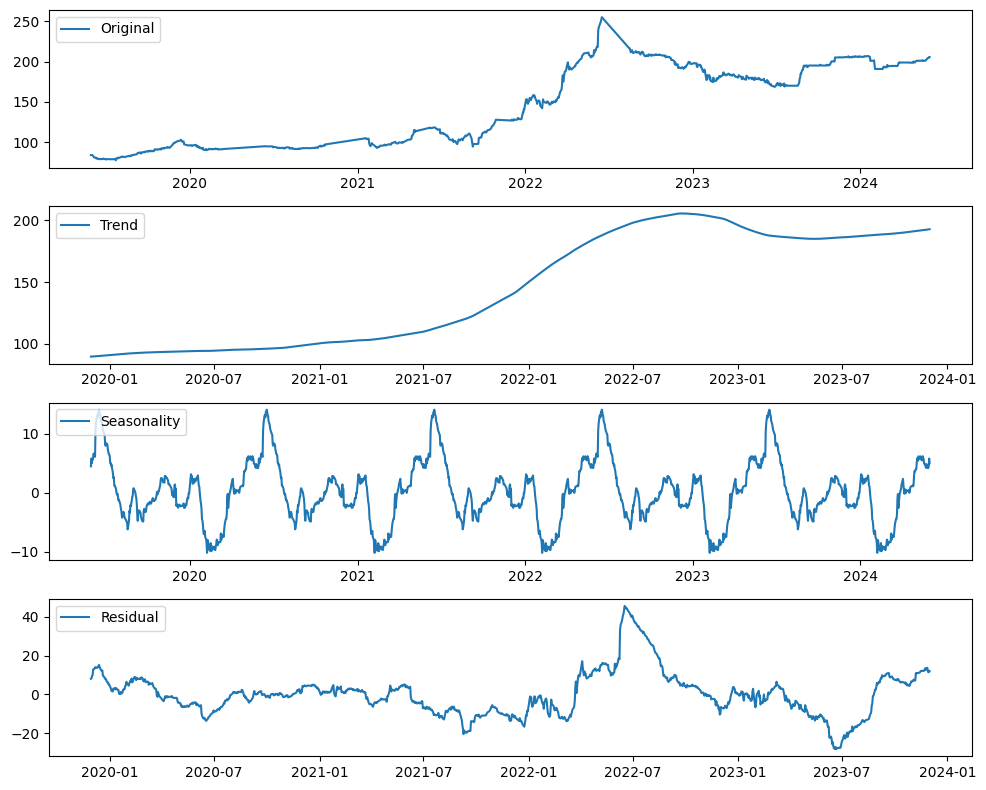

In [209]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

filtered_df.set_index('date', inplace=True)

# Perform seasonal decomposition (additive model is often used for price data)
decomposition = seasonal_decompose(filtered_df['pettah_average'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(filtered_df['pettah_average'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Plot the ACF and PACF to Residuals on Seasonal Decomposistion

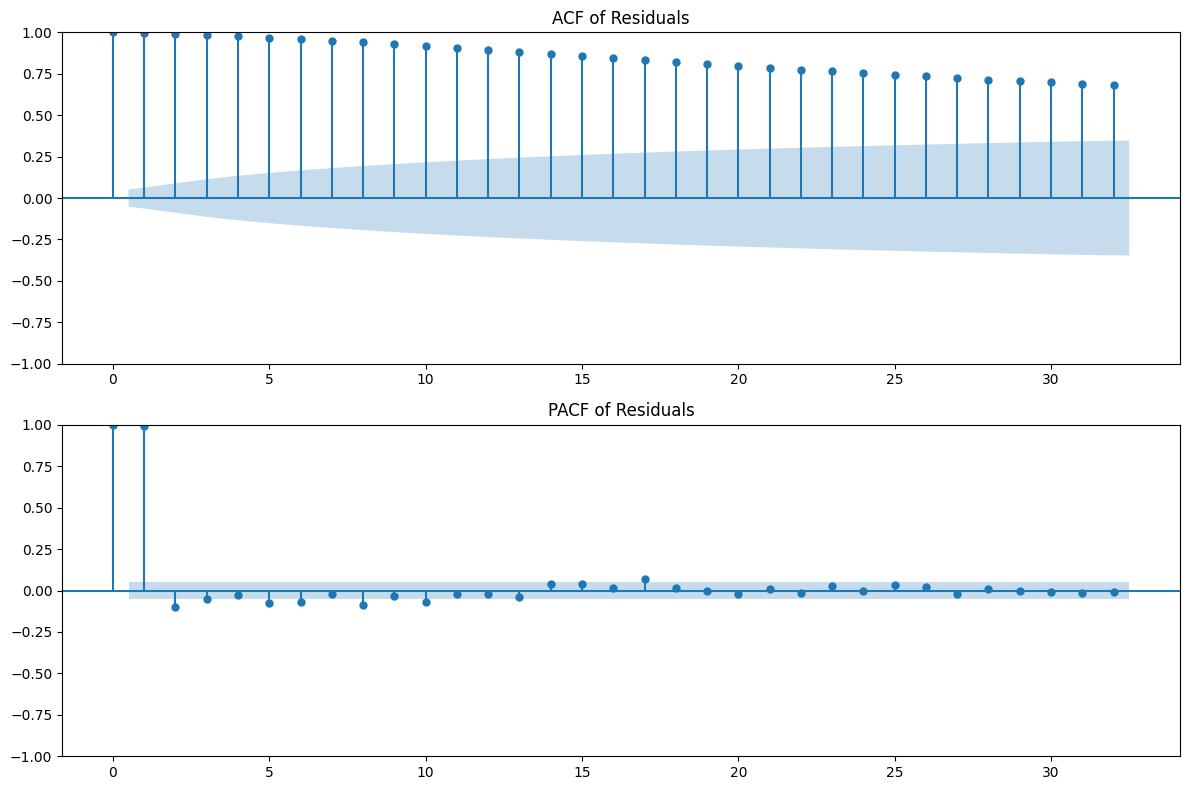

In [210]:
import statsmodels.api as sm

# Plotting the ACF and PACF of the residuals to analyze autocorrelation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plotting ACF
sm.graphics.tsa.plot_acf(decomposition.resid.dropna(), ax=ax1)
ax1.set_title("ACF of Residuals")

# Plotting PACF
sm.graphics.tsa.plot_pacf(decomposition.resid.dropna(), ax=ax2)
ax2.set_title("PACF of Residuals")

plt.tight_layout()
plt.show()

## Seasonal Trend Decomposition

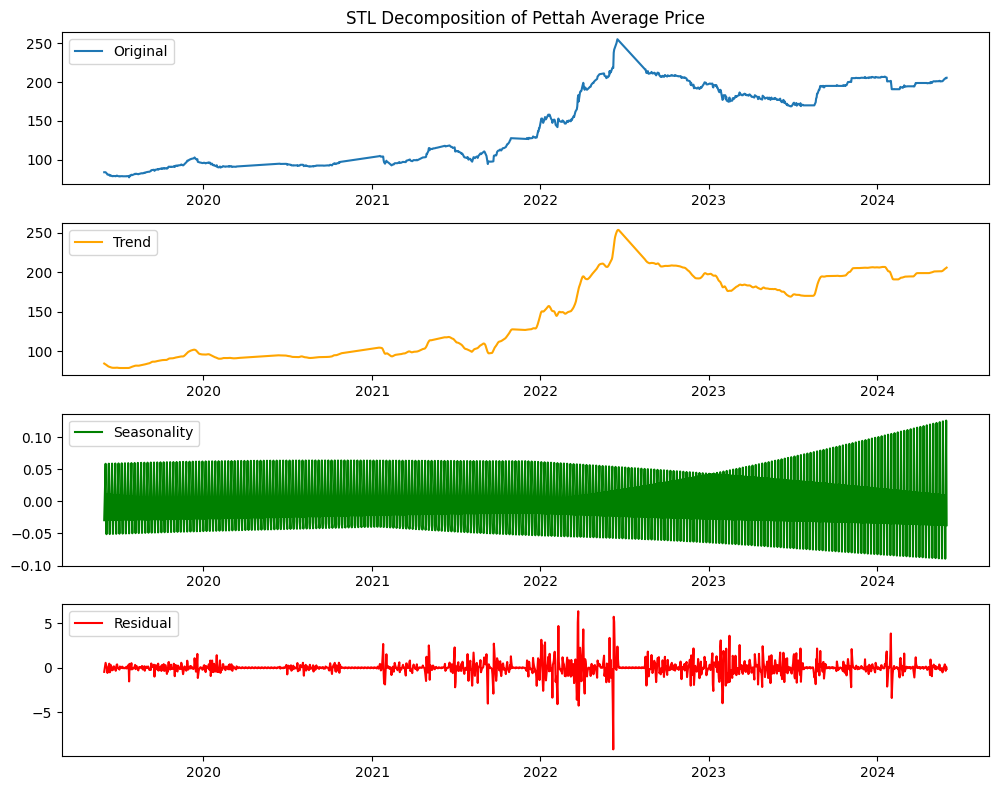

In [211]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Perform STL decomposition
stl = STL(filtered_df['pettah_average'], seasonal=365)

stl_decomposition = stl.fit()

# Plot the decomposed components
plt.figure(figsize=(10, 8))

# Original Series
plt.subplot(4, 1, 1)
plt.plot(filtered_df['pettah_average'], label='Original')
plt.legend(loc='upper left')
plt.title('STL Decomposition of Pettah Average Price')

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(stl_decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(stl_decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

# Residual Component
plt.subplot(4, 1, 4)
plt.plot(stl_decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


## Plot the ACF and PACF to Residuals on Seasonal Trend Decomposistion


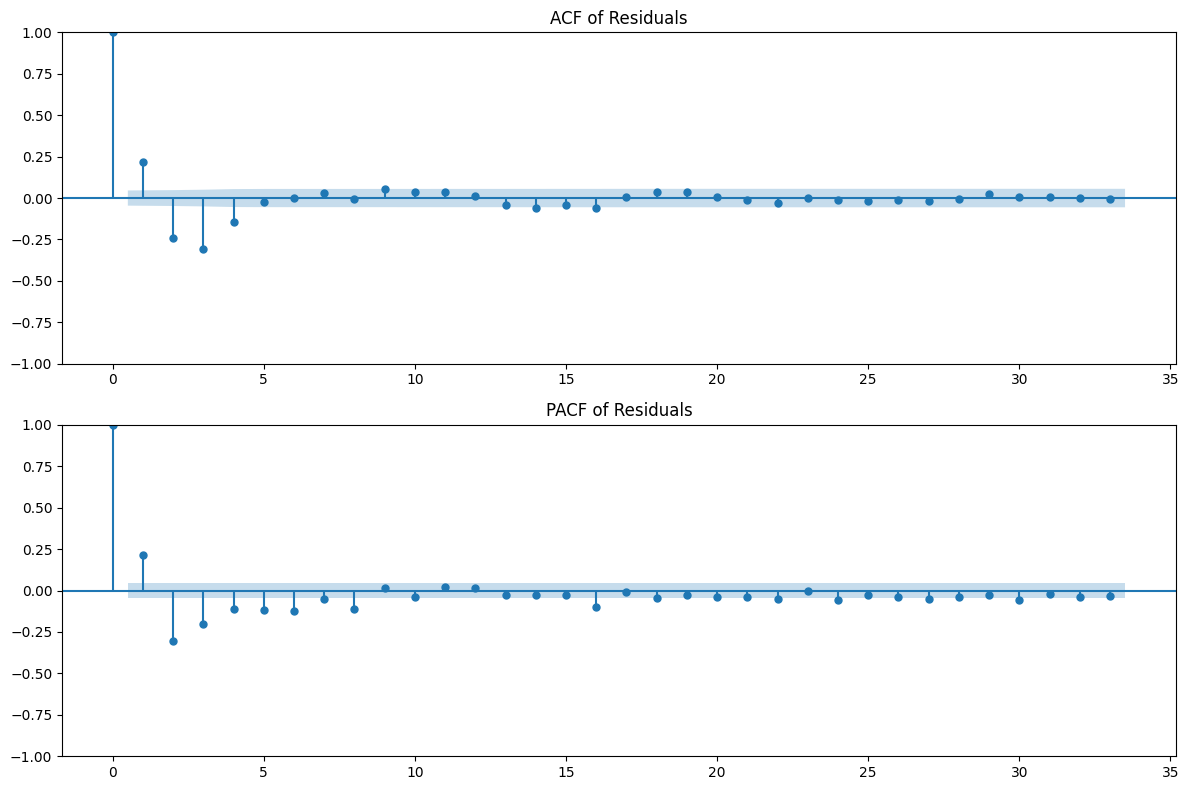

In [212]:
import statsmodels.api as sm

# Plotting the ACF and PACF of the residuals to analyze autocorrelation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plotting ACF
sm.graphics.tsa.plot_acf(stl_decomposition.resid.dropna(), ax=ax1)
ax1.set_title("ACF of Residuals")

# Plotting PACF
sm.graphics.tsa.plot_pacf(stl_decomposition.resid.dropna(), ax=ax2)
ax2.set_title("PACF of Residuals")

plt.tight_layout()
plt.show()

###  Note 
1. Residuals shows a corelation with its lags therefore its not random and seems prices depend on external factors

## Time Series - ADF Fuller - Data Stationary Check

In [213]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test on the specific column (replace 'price_column' with your column name)
adf_result = adfuller(filtered_df['pettah_average'])

# Print the results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: -0.8983795349097404
p-value: 0.7885055916557444
Critical Values:
   1%: -3.433966009459769
   5%: -2.8631372667825503
   10%: -2.567620331903232



### Non-Stationary Time Series

A time series is non-stationary if its statistical properties change over time. In other words, a non-stationary series may have:

- Trends: The mean of the series may increase or decrease over time.
- Changing Variance: The spread around the mean may increase or decrease over time.
- Seasonality: The series may show repeating patterns or cycles at regular intervals.
- Autocovariance Depends on Time: The covariance between points can change depending on the specific time period.

## 1st Order Differencing

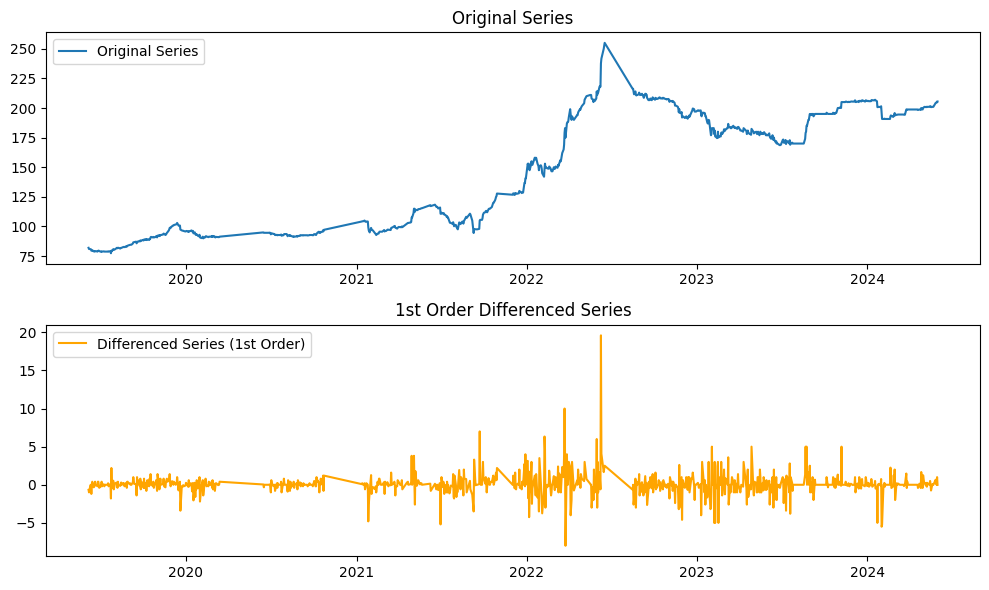

ADF Statistic: -9.782767827603404
p-value: 6.665207004114127e-17
Critical Values:
   1%: -3.437081640468809
   5%: -2.864511960193817
   10%: -2.568352427087857


In [214]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# First-order differencing
filtered_df['pettah_average_diff'] = filtered_df['pettah_average'].diff()

# Drop the first row as it will be NaN due to differencing
filtered_df.dropna(inplace=True)

# Plot the original series and the differenced series
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(filtered_df['pettah_average'], label='Original Series')
plt.title('Original Series')
plt.legend(loc='upper left')

plt.subplot(2, 1, 2)
plt.plot(filtered_df['pettah_average_diff'], label='Differenced Series (1st Order)', color='orange')
plt.title('1st Order Differenced Series')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Run ADF test on the differenced series to check for stationarity
adf_result = adfuller(filtered_df['pettah_average_diff'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')


## ACF and PACF plots on Differenced Original Data

### Note 
- 1 ACF Plot: Helps in determining q (the order of the moving average).
- 2 PACF Plot: Helps in determining p (the order of the autoregressive model).

<function matplotlib.pyplot.show(close=None, block=None)>

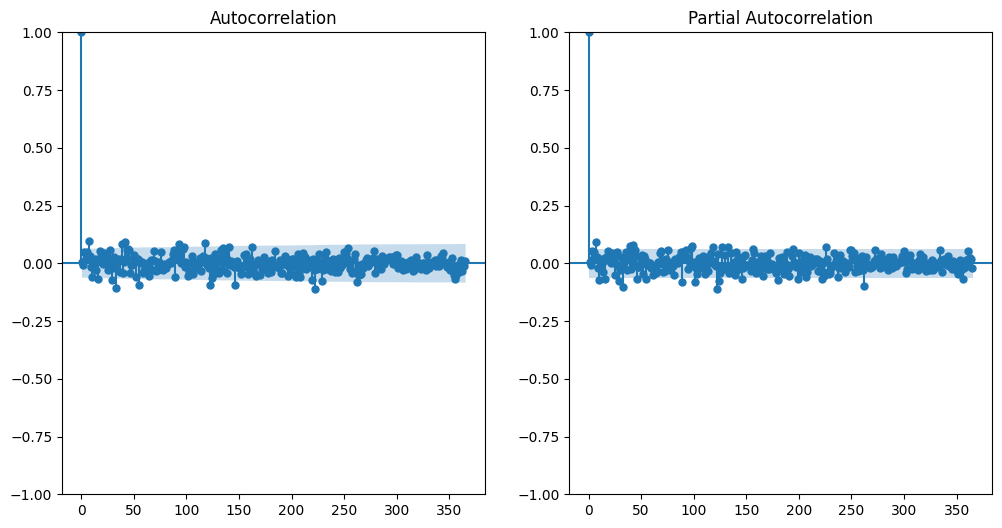

In [215]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for the differenced series
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(filtered_df['pettah_average_diff'].dropna(), lags=365, ax=plt.gca())
plt.subplot(122)
plot_pacf(filtered_df['pettah_average_diff'].dropna(), lags=365, ax=plt.gca())
plt.show

In [216]:
filtered_df.head()
filtered_df.reset_index('date', inplace=True)
filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_df.set_index('date', inplace=True)
filtered_df.head()

,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint,scaled_inflation,scaled_rice_price,inflation_lag_1,inflation_lag_3,inflation_lag_6,pettah_average_diff
date,,,,,,,,,,,,,,,
2019-06-06,Rice (Rs/kg)_Nadu 2,82.0,78.0,83.0,134.5,4.34,0.0,5.0,80.5,0.01769,0.025901,0.01769,0.01769,0.000000,-0.666667
2019-06-07,Rice (Rs/kg)_Nadu 2,81.0,78.0,84.0,134.5,19.28,0.0,6.0,81.0,0.01769,0.020270,0.01769,0.01769,0.005897,-1.000000
2019-06-10,Rice (Rs/kg)_Nadu 2,80.8,78.0,83.0,134.5,6.50,0.0,5.0,80.5,0.01769,0.019144,0.01769,0.01769,0.017690,-0.066667
2019-06-11,Rice (Rs/kg)_Nadu 2,80.8,78.0,84.0,134.5,8.99,0.0,6.0,81.0,0.01769,0.019144,0.01769,0.01769,0.017690,0.000000
2019-06-12,Rice (Rs/kg)_Nadu 2,79.6,78.0,82.0,134.5,5.97,0.0,4.0,80.0,0.01769,0.012387,0.01769,0.01769,0.017690,-1.200000


## Time Series Feature Creatures 

In [217]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Define the create_features function with Maha and Yala seasons
def create_features(df, label=None):
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    
    # Maha, Yala, and Intermonsoon season assignment
    df['sri_lanka_season'] = df['month'].apply(
        lambda x: 'Maha' if x in [9, 10, 11, 12, 1, 2, 3] else
                  'Yala' if x in [5, 6, 7, 8] else
                  'Intermonsoon')

    # Select features for X
    X = df[['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
            'dayofmonth', 'weekofyear', 'weekday', 'sri_lanka_season']]
    
    # If a label is specified, return both features and label
    if label:
        y = df[label]
        return X, y
    return X

# Call the function to create features with 'pettah_average' as the label
X, y = create_features(filtered_df, label='pettah_average')

# Concatenate features and label for inspection
features_and_target = pd.concat([X, y], axis=1)
features_and_target.tail()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday,sri_lanka_season,pettah_average
date,,,,,,,,,,,
2024-05-27,0,0,2,5,2024,148,27,22,Monday,Yala,204.33
2024-05-28,0,1,2,5,2024,149,28,22,Tuesday,Yala,204.50
2024-05-29,0,2,2,5,2024,150,29,22,Wednesday,Yala,204.50
2024-05-30,0,3,2,5,2024,151,30,22,Thursday,Yala,205.50
2024-05-31,0,4,2,5,2024,152,31,22,Friday,Yala,205.50


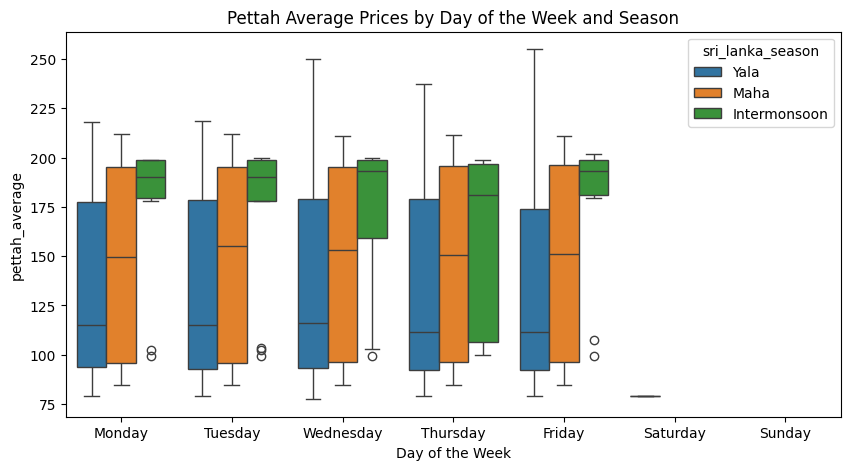

In [ ]:
# Plotting the boxplot
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='weekday',
            y='pettah_average',
            hue='sri_lanka_season',
            ax=ax,
            linewidth=1)
ax.set_title('Pettah Average Prices by Day of the Week and Season 2019(May)-2024(May)')
ax.set_xlabel('Day of the Week')
plt.show()

### Season Effect Analysis

- Each season exhibits a distinct price range, with the Maha season often having higher median prices than Yala

- The Maha season consistently has the highest median prices across almost all weekdays, especially on Tuesday. This indicates that prices tend to be elevated during the Maha season.

- The Intermonsoon season generally shows a narrower IQR across most days, which could suggest more consistent prices during this season compared to the Yala and Maha seasons.

- There are several outliers, especially in the Intermonsoon (Unusually low and high) - there can be other reasons due to festival month






### Day Specific Observation

- Wednesday and Friday : The Yala season has a particularly wide range, indicating high price variability than the Maha Season.

### Seasonal Patterns Across the Week

- The general trend suggests that Maha season prices tend to remain higher across most days, with a few exceptions, while the Yala season has relatively lower median prices but also exhibits greater variability.

### Comparative Insight
- Among the three seasons, the Maha season seems to lead to generally higher prices. This could be due to demand or supply factors specific to this season